In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel("pallet-data.xlsx")

In [ ]:
data

,Time(s),Time(min),Time(h),Time(day),Point -1,Point -2,Point -3,Point -4,Point -5,Point -6,Point -7,Point -8,Point -9
0,0,0,0.000000,0.000000,308.000000,307.999939,308.000000,307.999969,308.000031,307.999969,308.000000,308.000000,308.000000
1,600,10,0.166667,0.006944,303.727997,305.248322,304.445129,306.194275,306.758453,305.799561,305.604980,306.636963,307.053406
2,1200,20,0.333333,0.013889,301.485901,302.797089,302.025116,304.074799,305.017517,303.738861,303.756439,304.906067,305.747223
3,1800,30,0.500000,0.020833,299.803711,300.759460,300.168274,302.128479,303.185638,301.883545,302.105621,303.181671,304.388550
4,2400,40,0.666667,0.027778,298.395294,299.035675,298.650269,300.424866,301.426758,300.216614,300.602142,301.563873,303.075623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,40800,680,11.333333,0.472222,283.963562,283.631042,283.648926,283.545013,286.577362,286.484436,286.443115,286.517456,285.681274
69,41400,690,11.500000,0.479167,283.923401,283.600037,283.617615,283.517334,286.540192,286.444305,286.402008,286.479004,285.612152
70,42000,700,11.666667,0.486111,283.885956,283.571747,283.589050,283.492249,286.502411,286.403687,286.360504,286.440063,285.544922
71,42600,710,11.833333,0.493056,283.851044,283.545929,283.562897,283.469391,286.464172,286.362762,286.318787,286.400787,285.479614


In [ ]:
data1=data.drop(['Time(s)','Time(h)',"Time(day)"],axis=1)
data1

,Time(min),Point -1,Point -2,Point -3,Point -4,Point -5,Point -6,Point -7,Point -8,Point -9
0,0,308.000000,307.999939,308.000000,307.999969,308.000031,307.999969,308.000000,308.000000,308.000000
1,10,303.727997,305.248322,304.445129,306.194275,306.758453,305.799561,305.604980,306.636963,307.053406
2,20,301.485901,302.797089,302.025116,304.074799,305.017517,303.738861,303.756439,304.906067,305.747223
3,30,299.803711,300.759460,300.168274,302.128479,303.185638,301.883545,302.105621,303.181671,304.388550
4,40,298.395294,299.035675,298.650269,300.424866,301.426758,300.216614,300.602142,301.563873,303.075623
...,...,...,...,...,...,...,...,...,...,...
68,680,283.963562,283.631042,283.648926,283.545013,286.577362,286.484436,286.443115,286.517456,285.681274
69,690,283.923401,283.600037,283.617615,283.517334,286.540192,286.444305,286.402008,286.479004,285.612152
70,700,283.885956,283.571747,283.589050,283.492249,286.502411,286.403687,286.360504,286.440063,285.544922
71,710,283.851044,283.545929,283.562897,283.469391,286.464172,286.362762,286.318787,286.400787,285.479614


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X=np.array(data1[["Point -1","Point -2","Point -3","Point -4"]])
y=np.array(data1[["Point -5","Point -6","Point -7","Point -8","Point -9"]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.5, random_state=42)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8)

In [ ]:
knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [ ]:
print(knn.predict(X_test))


[[297.94887913 297.14533238 297.60033412 298.30953212 299.96928788]
 [286.64887613 286.5633085  286.5247955  286.5925025  285.8469465 ]
 [288.881443   288.67322538 289.28665925 289.50481037 291.23452375]
 [297.94887913 297.14533238 297.60033412 298.30953213 299.96928788]
 [287.109951   287.04629887 287.346897   287.43070975 288.44763563]
 [286.64887613 286.5633085  286.5247955  286.5925025  285.8469465 ]
 [291.89404675 291.4561195  292.143364   292.52731712 294.55179213]
 [286.91945263 286.87793337 287.08926    287.14662925 287.993965  ]
 [290.59214775 290.25646212 290.93531425 291.24633025 293.2113075 ]
 [286.8654175  286.80770862 286.78044887 286.823761   286.47776412]
 [286.64887613 286.5633085  286.5247955  286.5925025  285.8469465 ]
 [286.96471787 286.91136537 287.18107587 287.25438675 288.17433537]
 [291.89404675 291.4561195  292.143364   292.52731712 294.55179213]
 [286.89125825 286.8680915  286.97369762 287.004078   287.717243  ]
 [297.94887913 297.14533237 297.60033412 298.309

In [ ]:
y_predict= knn.predict(X_test)

In [ ]:
y_test

array([[301.426758, 300.216614, 300.602142, 301.563873, 303.075623],
       [286.751709, 286.675293, 286.640015, 286.699402, 286.057404],
       [289.214081, 288.982788, 289.652405, 289.892487, 291.803345],
       [308.000031, 307.999969, 308.      , 308.      , 308.      ],
       [287.155304, 287.069794, 287.485687, 287.599854, 288.684265],
       [286.425446, 286.321472, 286.276794, 286.361115, 285.416382],
       [293.837708, 293.261963, 294.031464, 294.51178 , 296.813354],
       [286.671936, 286.620728, 286.918335, 286.995422, 287.710876],
       [292.271149, 291.817108, 292.592133, 292.991089, 295.282471],
       [286.966095, 286.92157 , 286.899597, 286.931335, 286.764618],
       [286.684662, 286.601288, 286.563385, 286.629028, 285.900879],
       [286.870514, 286.805176, 287.158112, 287.250977, 288.135681],
       [294.772797, 294.121338, 294.873169, 295.404297, 297.67276 ],
       [287.043243, 287.03714 , 287.03421 , 287.036591, 287.79483 ],
       [299.802063, 298.717834, 29

In [ ]:
predictions_pd=pd.DataFrame(y_predict)
tests_pd= pd.DataFrame(y_test)

In [ ]:
tests_pd

,0,1,2,3,4
0,301.426758,300.216614,300.602142,301.563873,303.075623
1,286.751709,286.675293,286.640015,286.699402,286.057404
2,289.214081,288.982788,289.652405,289.892487,291.803345
3,308.000031,307.999969,308.000000,308.000000,308.000000
4,287.155304,287.069794,287.485687,287.599854,288.684265
5,286.425446,286.321472,286.276794,286.361115,285.416382
6,293.837708,293.261963,294.031464,294.511780,296.813354
7,286.671936,286.620728,286.918335,286.995422,287.710876
8,292.271149,291.817108,292.592133,292.991089,295.282471
9,286.966095,286.921570,286.899597,286.931335,286.764618


In [ ]:
predictions_pd

,0,1,2,3,4
0,297.948879,297.145332,297.600334,298.309532,299.969288
1,286.648876,286.563309,286.524796,286.592502,285.846947
2,288.881443,288.673225,289.286659,289.504810,291.234524
3,297.948879,297.145332,297.600334,298.309532,299.969288
4,287.109951,287.046299,287.346897,287.430710,288.447636
5,286.648876,286.563309,286.524795,286.592502,285.846947
6,291.894047,291.456119,292.143364,292.527317,294.551792
7,286.919453,286.877933,287.089260,287.146629,287.993965
8,290.592148,290.256462,290.935314,291.246330,293.211307
9,286.865418,286.807709,286.780449,286.823761,286.477764


In [ ]:
t = data1['Time(min)']
y.shape

(73, 5)

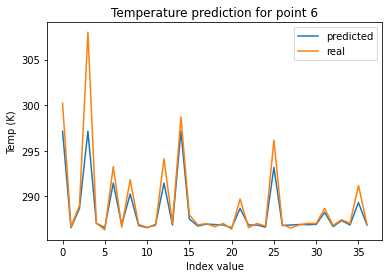

In [ ]:
plt.figure()

plt.plot(predictions_pd[1],label='predicted')

plt.plot(tests_pd[1],label='real')

plt.legend( bbox_to_anchor=(0.2, 0.2, 0.2, 0.2)
)
plt.xlabel('Index value')
plt.ylabel('Temp (K)')
plt.title('Temperature prediction for point 6')

plt.legend()
plt.show()
